# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.

### First, download the data from: https://www.kaggle.com/ntnu-testimon/paysim1. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?
### Note: don't use the entire dataset, use a sample instead, with n=100000 elements, so your computer doesn't freeze.

In [307]:
# Your code here
import pandas as pd
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

In [252]:
# importing the data
df = pd.read_csv('archive.zip')

In [253]:
# taking a small sample
df = df.sample(n=100000)

In [254]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [255]:
# we have 3 object types in our data, we'll have to take a look at those later; for now lets check out the numeric

In [256]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,100000.00000,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000,100000.000000
mean,243.80782,1.788562e+05,8.395548e+05,8.601806e+05,1.085740e+06,1.208520e+06,0.001370,0.000010
std,143.01453,6.203124e+05,2.889266e+06,2.923786e+06,3.177974e+06,3.514346e+06,0.036988,0.003162
min,1.00000,1.810000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,155.00000,1.353509e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,239.00000,7.428317e+04,1.444950e+04,0.000000e+00,1.350074e+05,2.130920e+05,0.000000,0.000000
75%,334.00000,2.086750e+05,1.107320e+05,1.464771e+05,9.416054e+05,1.112063e+06,0.000000,0.000000
max,741.00000,5.204280e+07,3.567455e+07,3.270524e+07,2.123595e+08,3.114049e+08,1.000000,1.000000


In [257]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
249739,14,CASH_OUT,9096.65,C35641317,0.0,0.0,C499714286,922327.09,931423.74,0,0
4197559,305,PAYMENT,11936.94,C1960484304,0.0,0.0,M941449651,0.00,0.00,0,0
4800564,346,TRANSFER,1566119.51,C1712971388,0.0,0.0,C902117956,14557740.95,16123860.46,0,0
3297526,252,CASH_OUT,470141.82,C746025396,101031.0,0.0,C517300574,25020.93,495162.75,0,0
4203041,305,CASH_OUT,527102.74,C1935129717,20173.0,0.0,C1519216494,5341051.44,5868154.18,0,0


In [258]:
df['type'].unique()

array(['CASH_OUT', 'PAYMENT', 'TRANSFER', 'CASH_IN', 'DEBIT'],
      dtype=object)

In [259]:
# I would normalize 'type' but I don't know what to do with nameOrig or nameDest

### What is the distribution of the outcome? 

In [260]:
# Your response here

# we know that the mean is 0.001270, so we know that 0.127% of transactions in our sample are fraudulent

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [261]:
# Your code here
# the documentation tells me the unit is hours. 
# I'll transform it into amount of days as well, and I'll transform that into months

def nr_days(hours):
    return hours//24
    
df['day'] = df['step'].apply(nr_days)
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,day
249739,14,CASH_OUT,9096.65,C35641317,0.0,0.0,C499714286,922327.09,931423.74,0,0,0
4197559,305,PAYMENT,11936.94,C1960484304,0.0,0.0,M941449651,0.00,0.00,0,0,12
4800564,346,TRANSFER,1566119.51,C1712971388,0.0,0.0,C902117956,14557740.95,16123860.46,0,0,14
3297526,252,CASH_OUT,470141.82,C746025396,101031.0,0.0,C517300574,25020.93,495162.75,0,0,10
4203041,305,CASH_OUT,527102.74,C1935129717,20173.0,0.0,C1519216494,5341051.44,5868154.18,0,0,12


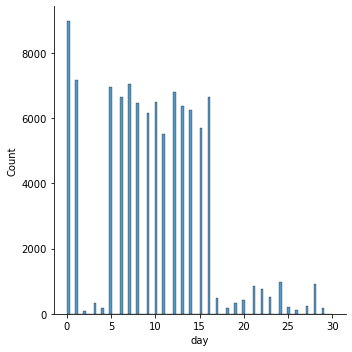

In [262]:
sns.displot(df, x='day')

In [263]:
# there's not more than a month of data here
# I'll try to translate the step to hour of day

def hour_day(step):
    day = nr_days(step)
    return step - day * 24

df['dayHour'] = df['step'].apply(hour_day)
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,day,dayHour
249739,14,CASH_OUT,9096.65,C35641317,0.0,0.0,C499714286,922327.09,931423.74,0,0,0,14
4197559,305,PAYMENT,11936.94,C1960484304,0.0,0.0,M941449651,0.00,0.00,0,0,12,17
4800564,346,TRANSFER,1566119.51,C1712971388,0.0,0.0,C902117956,14557740.95,16123860.46,0,0,14,10
3297526,252,CASH_OUT,470141.82,C746025396,101031.0,0.0,C517300574,25020.93,495162.75,0,0,10,12
4203041,305,CASH_OUT,527102.74,C1935129717,20173.0,0.0,C1519216494,5341051.44,5868154.18,0,0,12,17


In [264]:
# step does not seem to be usefull anymore, I'll drop it
df.drop(columns=['step'], inplace = True)
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,day,dayHour
249739,CASH_OUT,9096.65,C35641317,0.0,0.0,C499714286,922327.09,931423.74,0,0,0,14
4197559,PAYMENT,11936.94,C1960484304,0.0,0.0,M941449651,0.00,0.00,0,0,12,17
4800564,TRANSFER,1566119.51,C1712971388,0.0,0.0,C902117956,14557740.95,16123860.46,0,0,14,10
3297526,CASH_OUT,470141.82,C746025396,101031.0,0.0,C517300574,25020.93,495162.75,0,0,10,12
4203041,CASH_OUT,527102.74,C1935129717,20173.0,0.0,C1519216494,5341051.44,5868154.18,0,0,12,17


In [265]:
df = pd.get_dummies(df,columns=['type'])
df.head()

,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,day,dayHour,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
249739,9096.65,C35641317,0.0,0.0,C499714286,922327.09,931423.74,0,0,0,14,0,1,0,0,0
4197559,11936.94,C1960484304,0.0,0.0,M941449651,0.00,0.00,0,0,12,17,0,0,0,1,0
4800564,1566119.51,C1712971388,0.0,0.0,C902117956,14557740.95,16123860.46,0,0,14,10,0,0,0,0,1
3297526,470141.82,C746025396,101031.0,0.0,C517300574,25020.93,495162.75,0,0,10,12,0,1,0,0,0
4203041,527102.74,C1935129717,20173.0,0.0,C1519216494,5341051.44,5868154.18,0,0,12,17,0,1,0,0,0


In [266]:
# I think having the columns 'nameOrig' and 'nameDest' is counter productive. We would be training our model to find the
# fraudulent individuals, not the features of the transactions
# I'll drop them both

df.drop(columns=['nameOrig','nameDest'], inplace = True)
df.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,day,dayHour,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
249739,9096.65,0.0,0.0,922327.09,931423.74,0,0,0,14,0,1,0,0,0
4197559,11936.94,0.0,0.0,0.00,0.00,0,0,12,17,0,0,0,1,0
4800564,1566119.51,0.0,0.0,14557740.95,16123860.46,0,0,14,10,0,0,0,0,1
3297526,470141.82,101031.0,0.0,25020.93,495162.75,0,0,10,12,0,1,0,0,0
4203041,527102.74,20173.0,0.0,5341051.44,5868154.18,0,0,12,17,0,1,0,0,0


In [267]:
df.shape

(100000, 14)

In [268]:
# I'll normalize the amounts of money
from sklearn.preprocessing import MinMaxScaler

currency = df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]
norm = MinMaxScaler().fit(currency)
df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']] = norm.transform(currency)

#currency_normalized = pd.DataFrame(currency_normalized, columns = currency.columns)
#currency_normalized.head()


In [269]:
print(df.shape)
df.tail()

(100000, 14)


,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,day,dayHour,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
2543873,0.000109,0.003622,0.003777,0.000000,0.000000,0,0,8,14,0,0,0,1,0
6124993,0.008616,0.002425,0.016355,0.001335,0.000000,0,0,22,12,1,0,0,0,0
1135755,0.003738,0.000000,0.000000,0.006102,0.004786,0,0,5,11,0,1,0,0,0
39907,0.000248,0.005649,0.005768,0.000000,0.000000,0,0,0,9,0,0,0,1,0
881804,0.009168,0.001443,0.016162,0.000000,0.000000,0,0,1,18,1,0,0,0,0


In [270]:
# the isFlaggedFraud is always 0, I'll drop it
df.drop(columns=['isFlaggedFraud'], inplace=True)

In [272]:
#let's check the dtypes one more time
df.dtypes

amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
day                 int64
dayHour             int64
type_CASH_IN        uint8
type_CASH_OUT       uint8
type_DEBIT          uint8
type_PAYMENT        uint8
type_TRANSFER       uint8
dtype: object

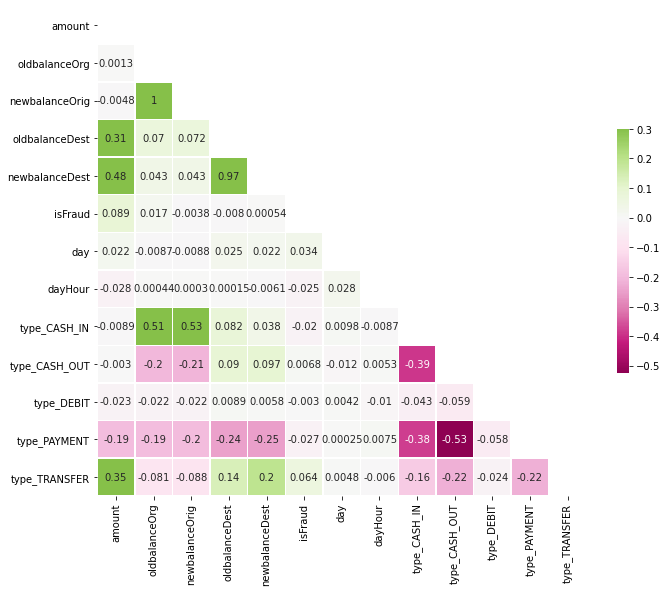

In [273]:
# let's just check for correlation issues

mask = np.triu(np.ones_like(df.corr(), dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(), mask=mask,annot=True, cmap="PiYG", vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [274]:
# now we must deal with the elefant in the room: the minimal amount of positives.

# oversampling / undersampling is only to be done on the TRAINING set
# we need to split the data now
X = df.drop('isFraud', axis=1)
y = df['isFraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print("X_train",X_train.shape)
print("X_test",X_test.shape)

X_train (75000, 12)
X_test (25000, 12)


In [275]:
# I'll assume we want minimize the chance of missing a fraudulent transaction, so we are ok with many false positives
# Let's oversample!

train = pd.concat([X_train, y_train],axis=1)
print(train.shape)
train.head()

(75000, 13)


,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,day,dayHour,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,isFraud
1252542,0.019066,0.000305,0.000000,0.000000,0.003186,5,14,0,0,0,0,1,0
4326583,0.001044,0.000452,0.000000,0.000000,0.000174,12,20,0,1,0,0,0,0
3917087,0.000160,0.000084,0.000000,0.000000,0.000000,11,20,0,0,0,1,0,0
704194,0.002800,0.000000,0.000000,0.001279,0.001340,1,13,0,1,0,0,0,0
5106888,0.003474,0.000193,0.005739,0.000000,0.000000,14,19,1,0,0,0,0,0


In [278]:
# separate majority/minority classes
no_fraud = train[train['isFraud']==0]
yes_fraud = train[train['isFraud']==1]
print("no_fraud",no_fraud.shape)
print("yes_fraud",yes_fraud.shape)

no_fraud (74889, 13)
yes_fraud (111, 13)


In [279]:
# oversample minority
yes_fraud_oversampled = resample(yes_fraud, #<- sample from here
                                    replace=True, #<- we need replacement, since we don't have enough data otherwise
                                    n_samples = len(no_fraud),#<- make both sets the same size
                                    random_state=0)
print('yes_fraud_oversampled',yes_fraud_oversampled.shape)

yes_fraud_oversampled            amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
6296002  0.003626       0.005290        0.000000        0.000000   
6168704  0.002451       0.003576        0.000000        0.001281   
6256791  0.106957       0.156032        0.000000        0.000000   
1030590  0.008744       0.012756        0.000000        0.043498   
1030590  0.008744       0.012756        0.000000        0.043498   
...           ...            ...             ...             ...   
6039445  0.005864       0.008555        0.000000        0.000000   
3960292  0.004509       0.006578        0.000000        0.000000   
3191414  0.002473       0.003608        0.000000        0.000000   
1059662  0.035439       0.051700        0.000000        0.000000   
6061825  0.192149       0.505127        0.245227        0.000000   

         newbalanceDest  day  dayHour  type_CASH_IN  type_CASH_OUT  \
6296002        0.000000   27       23             0              0   
6168704        0.0012

In [280]:
train_oversampled = pd.concat([no_fraud,yes_fraud_oversampled])
print('train_oversampled',train_oversampled.shape)
train_oversampled.head()

train_oversampled (149778, 13)


,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,day,dayHour,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,isFraud
1252542,0.019066,0.000305,0.000000,0.000000,0.003186,5,14,0,0,0,0,1,0
4326583,0.001044,0.000452,0.000000,0.000000,0.000174,12,20,0,1,0,0,0,0
3917087,0.000160,0.000084,0.000000,0.000000,0.000000,11,20,0,0,0,1,0,0
704194,0.002800,0.000000,0.000000,0.001279,0.001340,1,13,0,1,0,0,0,0
5106888,0.003474,0.000193,0.005739,0.000000,0.000000,14,19,1,0,0,0,0,0


In [281]:
y_train_over = train_oversampled['isFraud'].copy()
X_train_over = train_oversampled.drop('isFraud',axis = 1).copy()

### Run a logisitc regression classifier and evaluate its accuracy.

In [286]:
# Your code here

print('With overfit:')
LR = LogisticRegression(max_iter=1000)
LR.fit(X_train_over, y_train_over)
pred = LR.predict(X_test)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

confusion_matrix(y_test,pred)

With overfit:
precision:  0.008952899961074349
recall:  0.8846153846153846
f1:  0.017726396917148363


array([[22428,  2546],
       [    3,    23]], dtype=int64)

### Now pick a model of your choice and evaluate its accuracy.

In [293]:
import xgboost

xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train_over, y_train_over)
xgb_reg.score(X_test,y_test)

0.27400271604968673

In [297]:
pred = xgb_reg.predict(X_test)
confusion_matrix(y_test,(pred>0.5))
#confusion_matrix(y_test,pred)

array([[24964,    10],
       [    4,    22]], dtype=int64)

In [ ]:
# I'll try to improve the model now

In [314]:
# adapted from: https://setscholars.net/machine-learning-regression-in-python-using-xgboost-boston-housing-dataset-data-science-tutorials/

# -------------------------------------------------------------------------
# data split to train and test datasets
# -------------------------------------------------------------------------    
'''
def data_split(feature_names, target, dataset):
        # Data Transform - Split train : test datasets
        X_train, X_test, y_train, y_test = train_test_split(dataset.loc[:, feature_names], 
                                                            dataset.loc[:, target], test_size=0.33)
        return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = data_split(feature_names, target, dataset)
'''

# matching my variables with theirs (very lazy)
X_train, X_test, y_train, y_test = X_train_over, X_test, y_train_over, y_test

# -------------------------------------------------------------------------
# model training
# -------------------------------------------------------------------------    
def training_model(X_train, y_train):
        model = xgboost.XGBRegressor()
        
        # Grid search CV
        parameters = {'max_depth'     : [6,8,10],
                      'gamma'         : [0.2,0.5,0.6],
                      'learning_rate' : [0.01, 0.05, 0.1],
                      'n_estimators'  : [100, 500, 1000]
                      # Add more ... ... ... 
                      }
        
        grid = GridSearchCV(estimator=model, param_grid = parameters, cv = kfold, 
                            verbose = 1, n_jobs = -1, refit = True)
        grid.fit(X_train, y_train)

        # Results from Grid Search
        print("\n========================================================")
        print(" Results from Grid Search " )
        print("========================================================")    
        print("\n The best estimator across ALL searched params:\n",
              grid.best_estimator_)
        print("\n The best parameters across ALL searched params:\n",
              grid.best_params_)
        print("\n ========================================================")

        # Random Search CV
        parameters = {'max_depth'     : sp_randInt(6, 10),
                      'gamma'         : sp_randFloat(0.1, 0.9),
                      'learning_rate' : sp_randFloat(0.01, 0.1),
                      'n_estimators'  : sp_randInt(100, 1000)
                      # Add more ... ... ... 
                      }        
        randm = RandomizedSearchCV(estimator=model, 
                                   param_distributions = parameters, cv = kfold, 
                                   n_iter = 10, verbose = 1, n_jobs = -1)
        randm.fit(X_train, y_train)

        # Results from Random Search
        print("\n========================================================")
        print(" Results from Random Search " )
        print("========================================================")    
        print("\n The best estimator across ALL searched params:\n",
              randm.best_estimator_)
        print("\n The best score across ALL searched params:\n",
              randm.best_score_)
        print("\n The best parameters across ALL searched params:\n",
              randm.best_params_)
        print("\n ========================================================")
        print()

        print()
        print("Random Search score: ", randm.best_score_)
        print()
        print("Grid Search score: ", grid.best_score_)        
        print()

        if grid.best_score_ > randm.best_score_:
            print("The better model found in Grid Search ... ... ... ...\n\n")
            return(grid.best_estimator_)
        else:
            print("The better model found in Random Search ... ... ... ...\n\n")
            return(randm.best_estimator_)

# declare constants
kfold = 3

model = training_model(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 58.5min
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed: 600.8min finished



 Results from Grid Search 

 The best estimator across ALL searched params:
 XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.2, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

 The best parameters across ALL searched params:
 {'gamma': 0.2, 'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 500}

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 11.0min finished



 Results from Random Search 

 The best estimator across ALL searched params:
 XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.4625637757287099,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.03264445437262092, max_delta_step=0, max_depth=9,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=323, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

 The best score across ALL searched params:
 0.33307444836357286

 The best parameters across ALL searched params:
 {'gamma': 0.4625637757287099, 'learning_rate': 0.03264445437262092, 'max_depth': 9, 'n_estimators': 323}



Random Search score:  0.33307444836357286

Grid Search score:  0.33318503482019596

The better m

In [315]:
from sklearn.model_selection import cross_val_score


# ----------------------------------------------
# cross validation using the best fit model
# ----------------------------------------------
def cross_validatin_and_fitting(model, X_train, y_train):
        cv_results = cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'r2', 
                                 n_jobs = -1, verbose = 1)
        # Cross Validation Results
        print()
        print("Cross Validation results: ", cv_results)
        prt_string = "CV Mean r2 score: %f (Std: %f)"% (cv_results.mean(), cv_results.std())
        print(prt_string)
        
        # Final fitting of the Model
        model.fit(X_train, y_train)
        
        print(); print('========================================================')
        print(); print(model.get_params(deep = True))
        print(); print('========================================================')        
        
        # plot learning Curves
#        skplt.estimators.plot_learning_curve(model, X_train, y_train, figsize=(6,6))
#        plt.show()
        
        return model
model = cross_validatin_and_fitting(model, X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.6min finished



Cross Validation results:  [0.        0.9995551 0.       ]
CV Mean r2 score: 0.333185 (Std: 0.471195)


{'objective': 'reg:squarederror', 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0.2, 'gpu_id': -1, 'importance_type': 'gain', 'interaction_constraints': '', 'learning_rate': 0.05, 'max_delta_step': 0, 'max_depth': 10, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 500, 'n_jobs': 0, 'num_parallel_tree': 1, 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}



In [316]:
pred = model.predict(X_test)
confusion_matrix(y_test,(pred>0.5))

array([[24969,     5],
       [    5,    21]], dtype=int64)

### Which model worked better and how do you know?

In [30]:
# Your response here
'''
The extreme gradient boost is more accurate, but has a worse recall than the logistic regression classifier.
It has way less false positives, but more false negatives, despite the fact that it has less 
incorrect predictions overall (it is more accurate).
I reach this conclusion looking at the confusion matrixes.
I also notice that trying to optimize the parameters of the XGB had a negative impact on recall.
'''

### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.